# Classification Models

In [2]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Loading The Dataset
Mobile_Data = pd.read_csv('Train.csv')

In [ ]:
# Shape of data
Mobile_Data.shape

(2000, 21)

In [ ]:
# Head of Data (First Five Rows)
Mobile_Data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

## Data Preprocessing

In [ ]:
# Check for missing values
Mobile_Data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# Splitting the data into features and target variable
X = Mobile_Data.drop('price_range', axis=1)
y = Mobile_Data['price_range']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1600, 20), (400, 20))

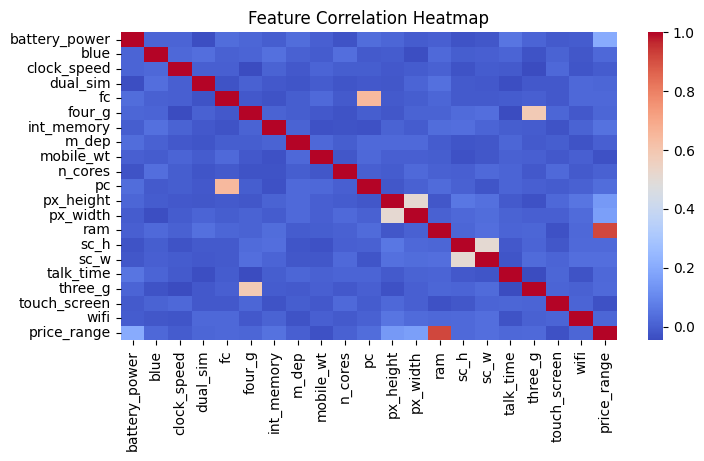

In [ ]:
# Correlation heatmap
correlation_matrix = Mobile_Data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Feature importance analysis using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

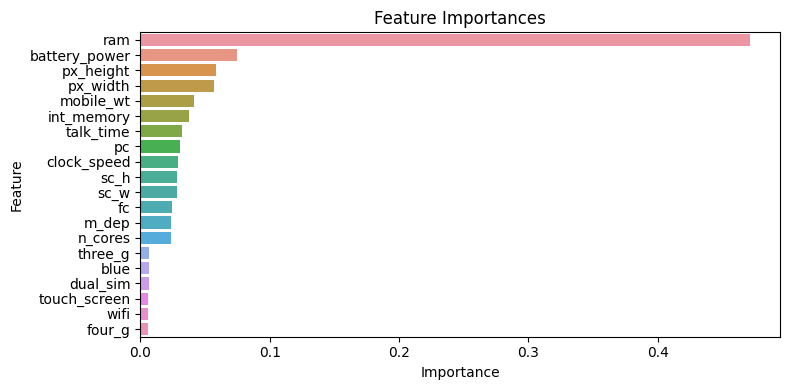

In [ ]:
# Get feature importances
feature_importances = rf.feature_importances_
features = X.columns
# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [ ]:
# droping the features with the lowest importance
features_to_drop = feature_importance_df.tail(6)['Feature']
X_train.drop(features_to_drop, axis=1, inplace = True)
X_test.drop(features_to_drop, axis=1, inplace = True)

In [ ]:
# shape of data after dropping unimportant features
X_train.shape

(1600, 14)

<Figure size 1500x1500 with 0 Axes>

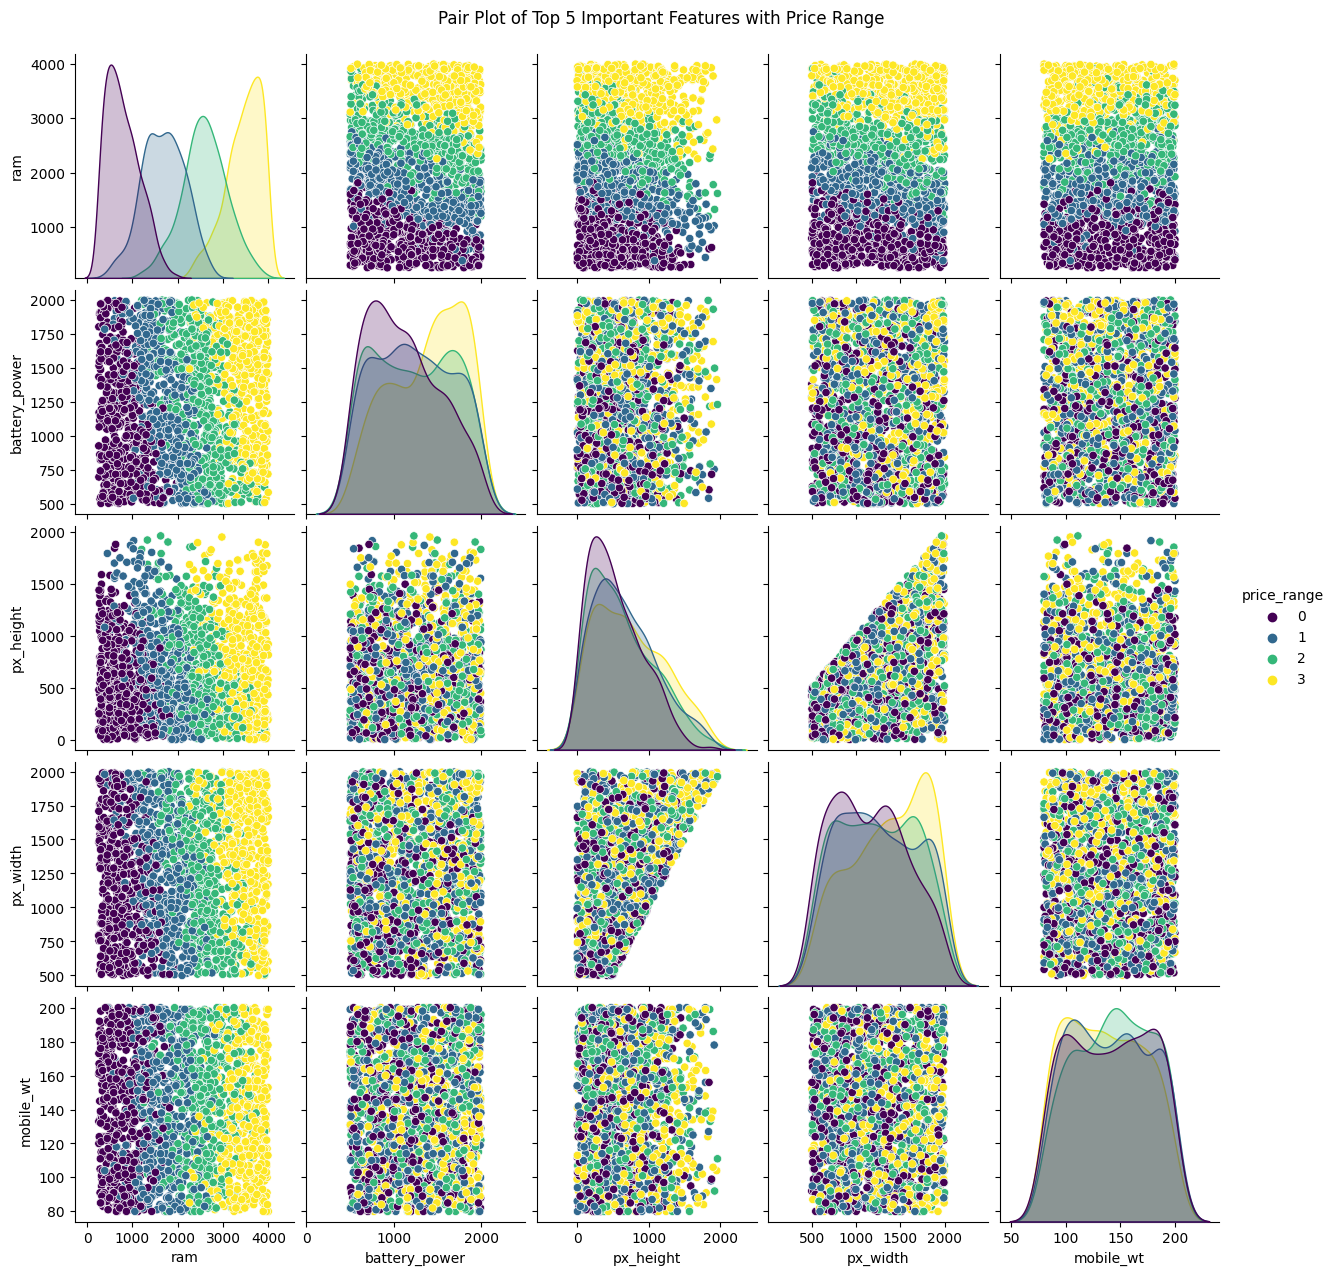

In [ ]:
# Selecting the top 5 important features along with the target variable for visualization
top_features = feature_importance_df.head(5)['Feature']
visualization_data = Mobile_Data[top_features.tolist() + ['price_range']]

# Pair plot for the selected features and the target variable
plt.figure(figsize=(15, 15))
sns.pairplot(visualization_data, hue='price_range', palette='viridis')
plt.suptitle('Pair Plot of Top 5 Important Features with Price Range', y=1.02)
plt.show()

## Multi Layer Perceptron Model

In [ ]:
# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
mlp_params_expanded = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.01, 0.001],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [64, 128, 'auto'],
    'early_stopping': [False, True],
    'validation_fraction': [0.1, 0.2],
}

mlp_grid = GridSearchCV(MLPClassifier(max_iter=1500), mlp_params_expanded, cv=5)
mlp_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1500),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [64, 128, 'auto'],
                         'early_stopping': [False, True],
                         'hidden_layer_sizes': [(100,), (50, 50),
                                                (100, 50, 25)],
                         'learning_rate_init': [0.01, 0.001],
                         'solver': ['adam', 'sgd'],
                         'validation_fraction': [0.1, 0.2]})

In [ ]:
best_mlp_params = mlp_grid.best_params_
print("Best MLP Hyperparameters:", best_mlp_params)

Best MLP Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'early_stopping': False, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'adam', 'validation_fraction': 0.2}


In [ ]:
mlp = MLPClassifier(**best_mlp_params, random_state=42,max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_test_mlp=mlp.predict(X_test)

In [ ]:
# Evaluate the model
mlp_accuracy = accuracy_score(y_test, y_pred_test_mlp)
report = classification_report(y_test ,y_pred_test_mlp)

print(f'Accuracy: {mlp_accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.765
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.64      0.80      0.71        91
           2       0.64      0.50      0.56        92
           3       0.84      0.81      0.83       112

    accuracy                           0.77       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.77      0.77      0.76       400



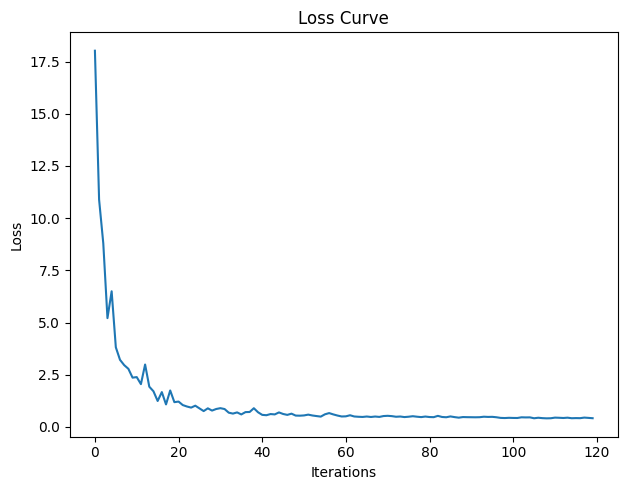

In [ ]:
# Loss and Accuracy Visualization
plt.figure(figsize=(12, 5))

# Plotting the loss curve
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

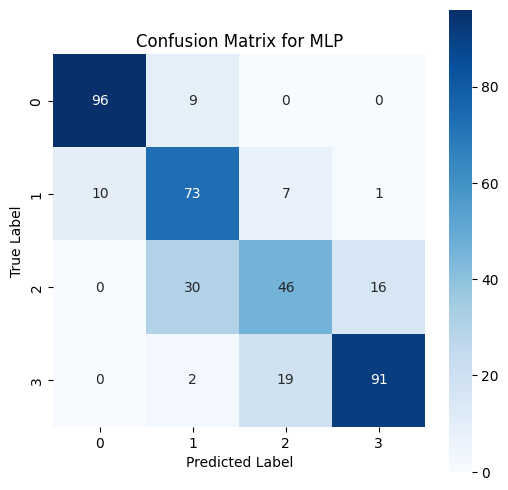

In [ ]:
# Confusion Matrix of the MLP Model
mlp_cm = confusion_matrix(y_test, y_pred_test_mlp)
plt.figure(figsize=(6, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Support Vector Machine Models

In [ ]:
# SVM Model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

print(f'Accuracy: {svm_accuracy}')
print('Classification Report:\n', svm_report)

Accuracy: 0.9675
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.96      0.95        92
           3       0.99      0.95      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
!pip install optuna

In [ ]:
# building the model after applying optuna params tuning
import optuna
def optimize_svc(trial):
    C = trial.suggest_float('C', 0.1, 10)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    model = SVC(
        C=C,
        gamma=gamma,
        kernel=kernel,
        probability=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)

study_svc = optuna.create_study(direction='maximize')
study_svc.optimize(optimize_svc, n_trials=50)

best_params_svc = study_svc.best_params
print("Best hyperparameters for SVC:", best_params_svc)

[I 2023-12-30 16:25:52,836] A new study created in memory with name: no-name-c40b92fd-d147-480a-9ac9-0cccac3e91c7
[I 2023-12-30 16:25:53,281] Trial 0 finished with value: 0.97 and parameters: {'C': 2.955775657709249, 'gamma': 'scale', 'kernel': 'rbf'}. Best is trial 0 with value: 0.97.
[I 2023-12-30 16:25:53,568] Trial 1 finished with value: 0.9725 and parameters: {'C': 2.85349432306191, 'gamma': 'scale', 'kernel': 'poly'}. Best is trial 1 with value: 0.9725.
[I 2023-12-30 16:25:56,186] Trial 2 finished with value: 0.2275 and parameters: {'C': 1.8613881485844397, 'gamma': 'auto', 'kernel': 'rbf'}. Best is trial 1 with value: 0.9725.
[I 2023-12-30 16:28:29,206] Trial 3 finished with value: 0.9775 and parameters: {'C': 7.858116400865899, 'gamma': 'auto', 'kernel': 'linear'}. Best is trial 3 with value: 0.9775.
[I 2023-12-30 16:28:30,435] Trial 4 finished with value: 0.2275 and parameters: {'C': 8.64660520529583, 'gamma': 'auto', 'kernel': 'rbf'}. Best is trial 3 with value: 0.9775.
[I 20

Best hyperparameters for SVC: {'C': 0.6561489990551657, 'gamma': 'auto', 'kernel': 'linear'}


In [ ]:
# Retrain SVC with best parameters
best_svc = SVC(**best_params_svc, probability=True, random_state=42)
best_svc.fit(X_train, y_train)

# Make predictions and evaluate
svc_predictions = best_svc.predict(X_test)
best_svc_acc = accuracy_score(y_test, svc_predictions)
print("Accuracy of Optimized SVC:", best_svc_acc)

Accuracy of Optimized SVC: 0.98


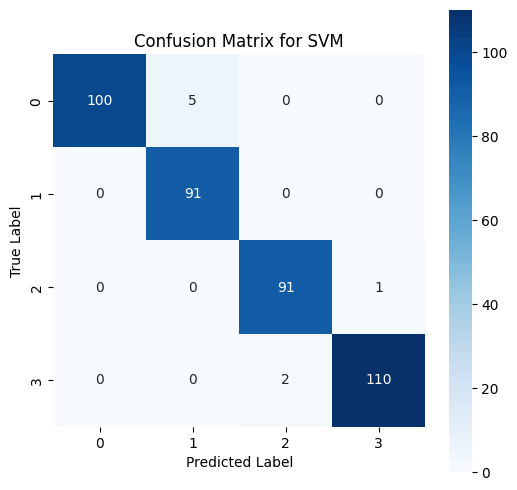

In [ ]:
# svm model confusion matrix
svm_cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

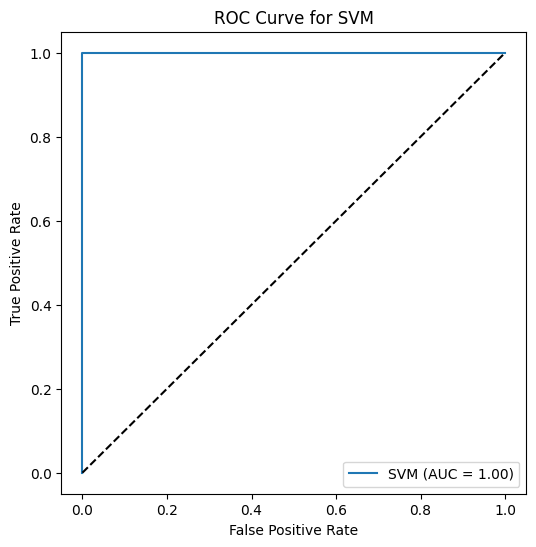

In [ ]:
# Visualize the ROC Curve for SVM
svm_y_prob = best_svc.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_prob[:, 1], pos_label=1)
auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

array([0.66808204, 0.16557839])

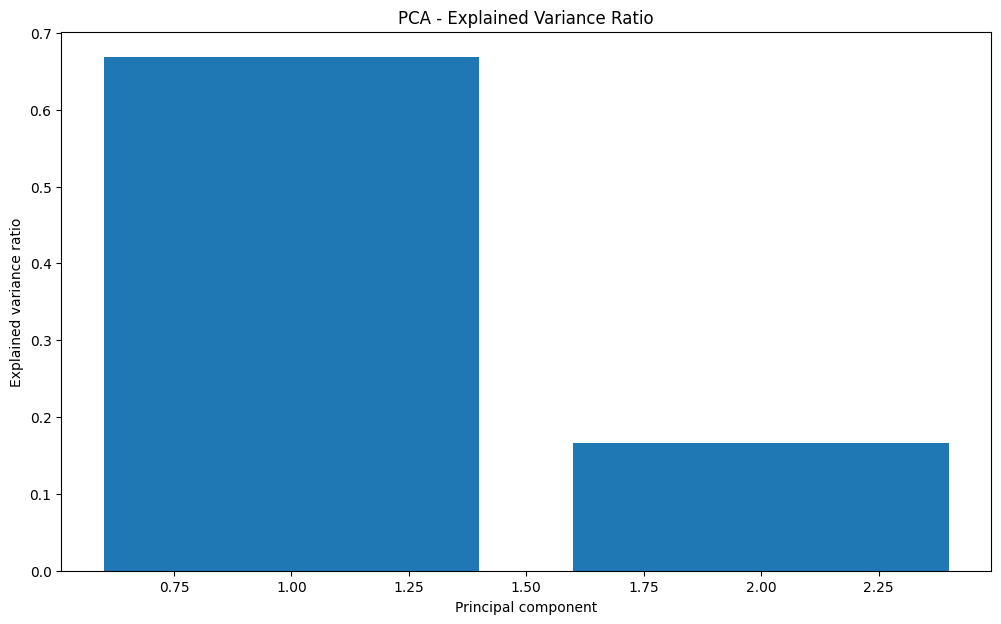

In [ ]:
# Visualize the variance explained by each principal component
plt.figure(figsize=(12, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) +1 ), pca.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('PCA - Explained Variance Ratio')
plt.show()

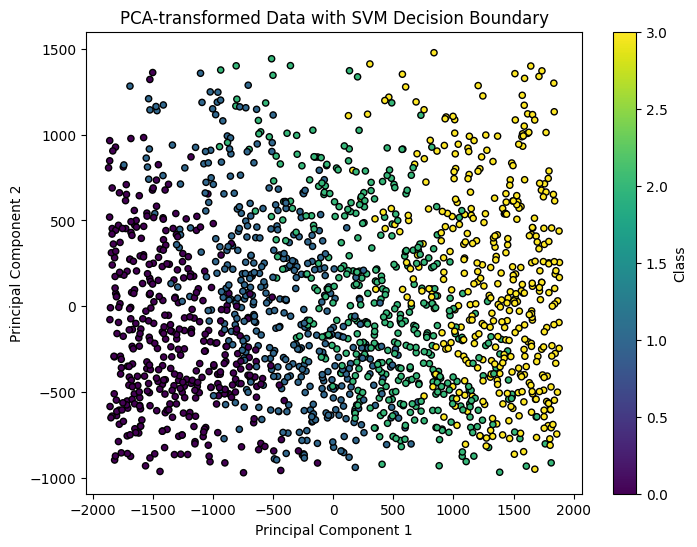

In [ ]:
# Visualization of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-transformed Data with SVM Decision Boundary')
plt.colorbar(label='Class')
plt.show()

### Random Forest Model

In [ ]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print(f'Accuracy: {rf_accuracy}')
print('Classification Report:\n', rf_report)

Accuracy: 0.865
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       105
           1       0.81      0.79      0.80        91
           2       0.76      0.78      0.77        92
           3       0.94      0.89      0.92       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.87       400



In [ ]:
# building the model after using grid search tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Reduced number of trees
    'max_features': ['auto', 'sqrt', 0.5],  # Limit features, consider half at most
    'max_depth': [5, 10, 15],  # Shallower trees
    'min_samples_split': [4, 6, 8],  # More samples needed to split
    'min_samples_leaf': [3, 4, 5]  # More samples at each leaf node
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [ ]:
optimized_rf = RandomForestClassifier(**best_params)
optimized_rf.fit(X_train, y_train)
y_pred_test_rf= optimized_rf.predict(X_test)

In [ ]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_test_rf)
report = classification_report(y_test ,y_pred_test_rf)

print(f'Accuracy: {rf_accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.87      0.92      0.89        91
           2       0.84      0.85      0.84        92
           3       0.95      0.90      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



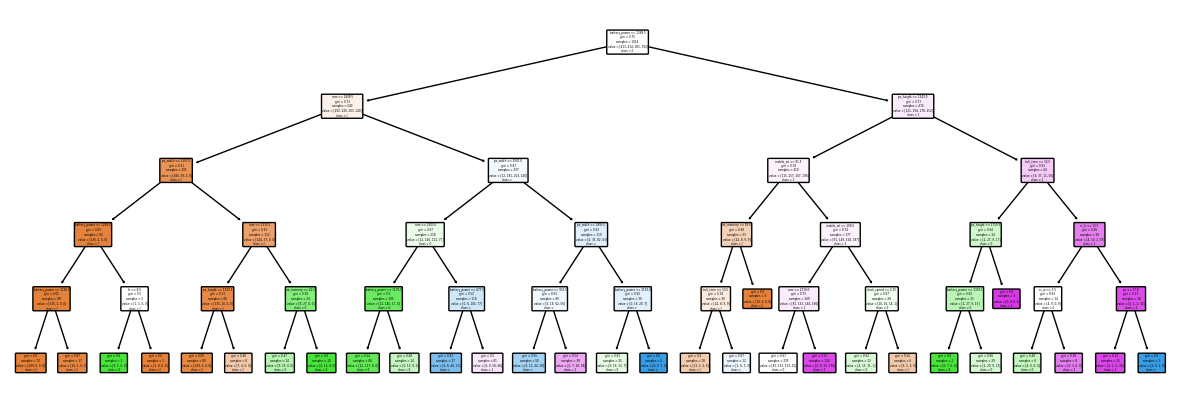

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the random forest
chosen_tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(15,5))
plot_tree(chosen_tree,
          filled=True,
          feature_names=X_train.columns,
          class_names=str(rf_model.classes_),
          rounded=True,
          proportion=False,
          precision=2)
plt.show()

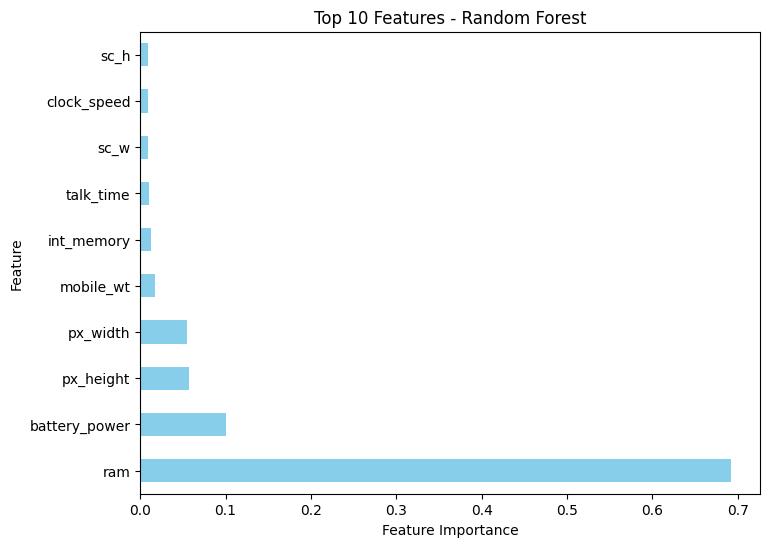

In [ ]:
plt.figure(figsize=(8, 6))
feat_importances_rf = pd.Series(optimized_rf.feature_importances_, index = X_train.columns)
feat_importances_rf.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Gradient Boosting Model

In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.06, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_report = classification_report(y_test, gb_pred)

print(f'Accuracy: {gb_accuracy}')
print('Classification Report:\n', gb_report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.82      0.81        91
           2       0.72      0.77      0.75        92
           3       0.91      0.86      0.88       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [ ]:
# building the model with using random params tuning
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [60, 80, 100],
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [2, 3],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [4, 6, 8],
    'subsample': [0.6, 0.7, 0.8],
    'max_features': ['auto', 'sqrt']
}

# Create a GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Instantiate the Random Search
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters and best model
best_params = random_search.best_params_
best_gb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
optimized_gb = GradientBoostingClassifier(**best_params)
optimized_gb.fit(X_train, y_train)
y_pred_test_gb= optimized_gb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
gb_accuracy = accuracy_score(y_test, y_pred_test_gb)
gb_report = classification_report(y_test, y_pred_test_gb)

print(f'Accuracy: {gb_accuracy}')
print('Classification Report:\n', gb_report)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.86      0.89      0.88        91
           2       0.79      0.83      0.81        92
           3       0.93      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



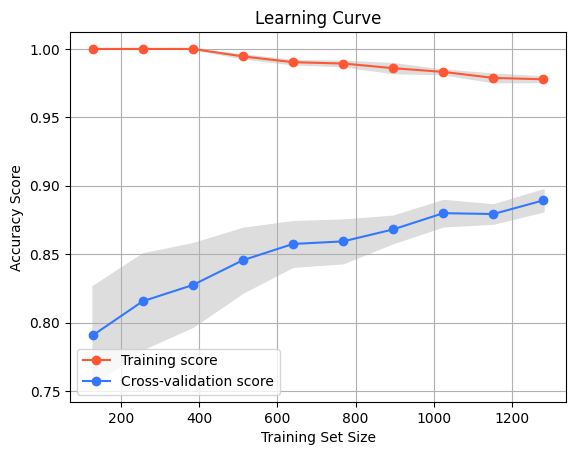

In [ ]:
from sklearn.model_selection import learning_curve

# Calculate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(optimized_gb, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5, n_jobs=-1, scoring='accuracy')

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, 'o-', color="#FF5733", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="#3377FF", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

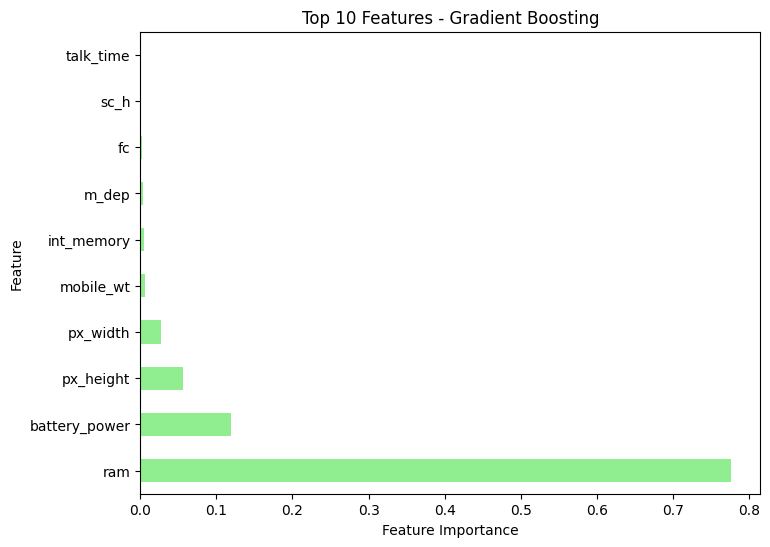

In [ ]:
# Visualize the Feature Importance for Gradient Boosting
plt.figure(figsize=(8, 6))
feat_importances_gb = pd.Series(optimized_gb.feature_importances_, index=X_train.columns)
feat_importances_gb.nlargest(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Features - Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Checking Overfitting in the Models

# Calculate training accuracy for each model
mlp_train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
svm_train_accuracy = accuracy_score(y_train, best_svc.predict(X_train))
rf_train_accuracy = accuracy_score(y_train, optimized_rf.predict(X_train))
gb_train_accuracy = accuracy_score(y_train, optimized_gb.predict(X_train))

# Compare training and testing accuracies
print("MLP - Training Accuracy:", mlp_train_accuracy, "| Test Accuracy:", mlp_accuracy)
print("SVM - Training Accuracy:", svm_train_accuracy, "| Test Accuracy:", best_svc_acc)
print("Random Forest - Training Accuracy:", rf_train_accuracy, "| Test Accuracy:", rf_accuracy)
print("Gradient Boosting - Training Accuracy:", gb_train_accuracy, "| Test Accuracy:", gb_accuracy)

MLP - Training Accuracy: 0.8125 | Test Accuracy: 0.765
SVM - Training Accuracy: 0.98875 | Test Accuracy: 0.98
Random Forest - Training Accuracy: 0.99375 | Test Accuracy: 0.91
Gradient Boosting - Training Accuracy: 0.97375 | Test Accuracy: 0.89


In [ ]:
# Calculate Precision, Recall, and F1-score for each model
mlp_precision = precision_score(y_test, y_pred_test_mlp, average='weighted')
mlp_recall = recall_score(y_test, y_pred_test_mlp, average='weighted')
mlp_f1 = f1_score(y_test, y_pred_test_mlp, average='weighted')

svm_precision = precision_score(y_test, svc_predictions, average='weighted')
svm_recall = recall_score(y_test, svc_predictions, average='weighted')
svm_f1 = f1_score(y_test, svc_predictions, average='weighted')

rf_precision = precision_score(y_test, y_pred_test_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_test_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_test_rf, average='weighted')

gb_precision = precision_score(y_test, y_pred_test_gb, average='weighted')
gb_recall = recall_score(y_test, y_pred_test_gb, average='weighted')
gb_f1 = f1_score(y_test, y_pred_test_gb, average='weighted')

In [ ]:
!pip install tabulate

from tabulate import tabulate

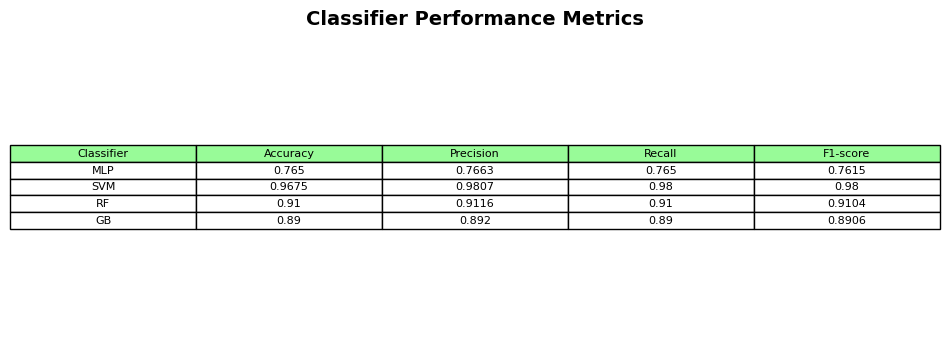

In [ ]:
columns = ["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
rows = [("MLP", 0.765, 0.7663, 0.765, 0.7615),
        ("SVM", 0.9675, 0.9807, 0.98, 0.9800),
        ("RF", 0.91, 0.9116, 0.91, 0.9104),
        ("GB", 0.89, 0.8920, 0.89, 0.8906)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))

# Hide axes
ax.axis('off')

# Table from data
tab = ax.table(cellText=rows, colLabels=columns, loc='center', cellLoc='center', colColours=["palegreen"] * 5)

# Set font size
tab.auto_set_font_size(False)
tab.set_fontsize(8)

# Title for the table
plt.title('Classifier Performance Metrics', weight='bold', size=14)

plt.show()

## Time Series

In [4]:
#Load the dataset
data = pd.read_csv("Vehicle (1).csv")

In [5]:
# Display the first few rows of the dataframe to understand its structure
data.head()

Hour  Vehicles
0     1       699
1     2       346
2     3       193
3     4       191
4     5       193

## Data Preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Vehicles']])

# Splitting the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Function to create dataset for RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Generate training and testing data for RNN
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshaping input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1350, 1, 1), (337, 1, 1), (1350,), (337,))

### ESN Model

In [7]:
class EchoStateNetwork:
    def __init__(self, input_size, reservoir_size, spectral_radius=0.8, sparsity=0.1):
        # Initialize the input weights randomly
        self.input_weights = np.random.rand(reservoir_size, input_size) - 0.5

        # Initialize the reservoir weights
        # Start with random weights
        reservoir_weights = np.random.rand(reservoir_size, reservoir_size) - 0.5
        # Apply sparsity
        reservoir_weights[np.random.rand(reservoir_size, reservoir_size) > sparsity] = 0
        # Scale the weights to have the desired spectral radius
        radius = np.max(np.abs(np.linalg.eigvals(reservoir_weights)))
        self.reservoir_weights = reservoir_weights * (spectral_radius / radius)

        self.reservoir_size = reservoir_size

    def _reservoir_state_update(self, current_state, input_data):
        # Update the reservoir state
        return np.tanh(np.dot(self.reservoir_weights, current_state) + np.dot(self.input_weights, input_data))

    def fit(self, X, y):
        # Initialize the reservoir state
        states = np.zeros((X.shape[0], self.reservoir_size))
        for t in range(X.shape[0]):
            states[t] = self._reservoir_state_update(states[t-1] if t > 0 else np.zeros(self.reservoir_size), X[t])

        # Train the readout layer using Ridge Regression for stability
        from sklearn.linear_model import Ridge
        ridge = Ridge(alpha=1.0)
        ridge.fit(states, y)
        self.readout_weights = ridge.coef_

        return self

    def predict(self, X):
        # Initialize the reservoir state
        states = np.zeros((X.shape[0], self.reservoir_size))
        for t in range(X.shape[0]):
            states[t] = self._reservoir_state_update(states[t-1] if t > 0 else np.zeros(self.reservoir_size), X[t])

        # Use the trained readout layer for prediction
        predictions = np.dot(states, self.readout_weights)
        return predictions

# Create an instance of the EchoStateNetwork
input_size = 1
reservoir_size = 75  # Size of the reservoir
esn = EchoStateNetwork(input_size, reservoir_size)

# Train the ESN
esn.fit(X_train[:, 0, :], y_train)

# Predict using the ESN
y_pred_train = esn.predict(X_train[:, 0, :])
y_pred_test = esn.predict(X_test[:, 0, :])

# Evaluate the model
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mse, test_mse

(0.024051659372983942, 0.024642427368990475)

### Predicting

In [8]:
# Select the last few entries from the test data as new input data
new_input_data = X_test[-5:, 0, :]

# Make predictions for these inputs
new_predictions = esn.predict(new_input_data)

# Inverse transform the predictions to bring them back to the original scale
new_predictions_inverse = scaler.inverse_transform(new_predictions.reshape(-1, 1))

new_predictions_inverse.flatten()  # Flatten the array for easier interpretation

array([ 194.18146701,  191.18946551,  449.88273711, 1560.99480281,
       4975.32758682])

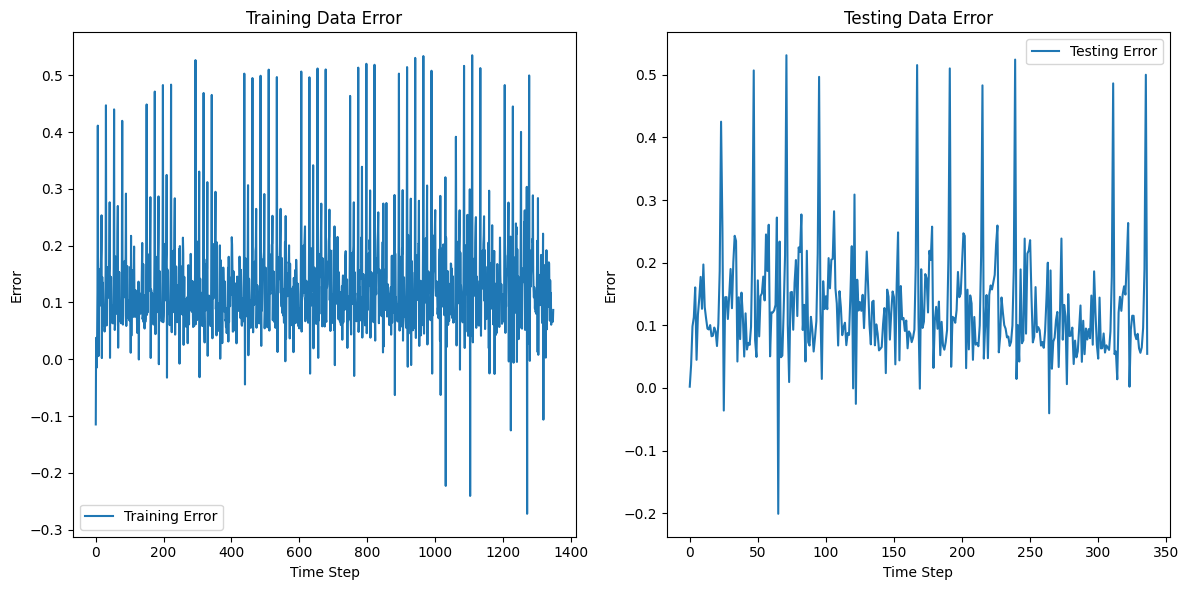

In [9]:
# Calculate the error (residuals) for training and testing data
train_error = y_train - y_pred_train
test_error = y_test - y_pred_test

# Plotting the error
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_error, label='Training Error')
plt.title('Training Data Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_error, label='Testing Error')
plt.title('Testing Data Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

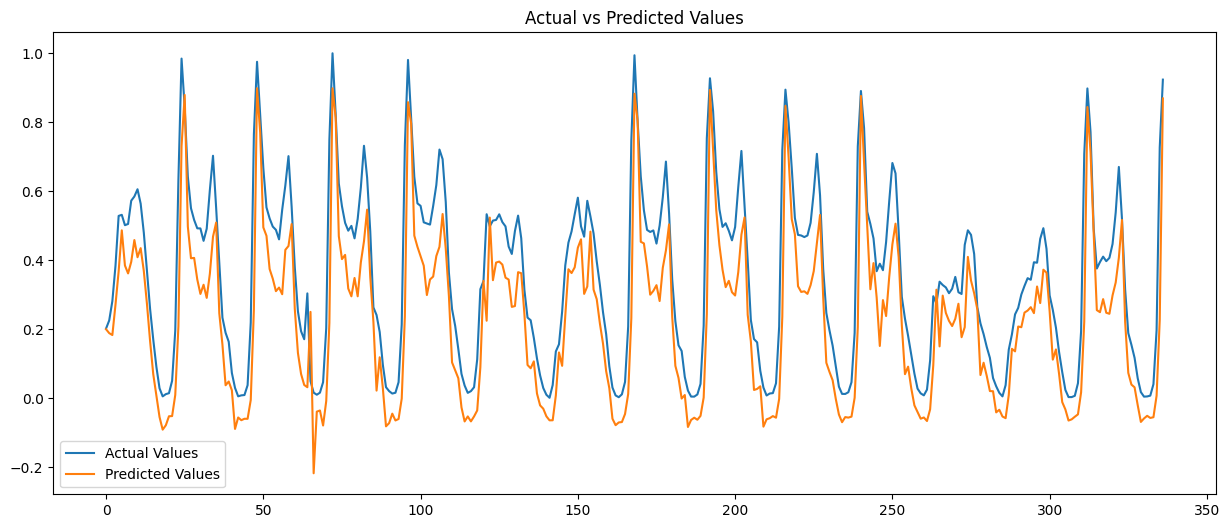

In [10]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred_test, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

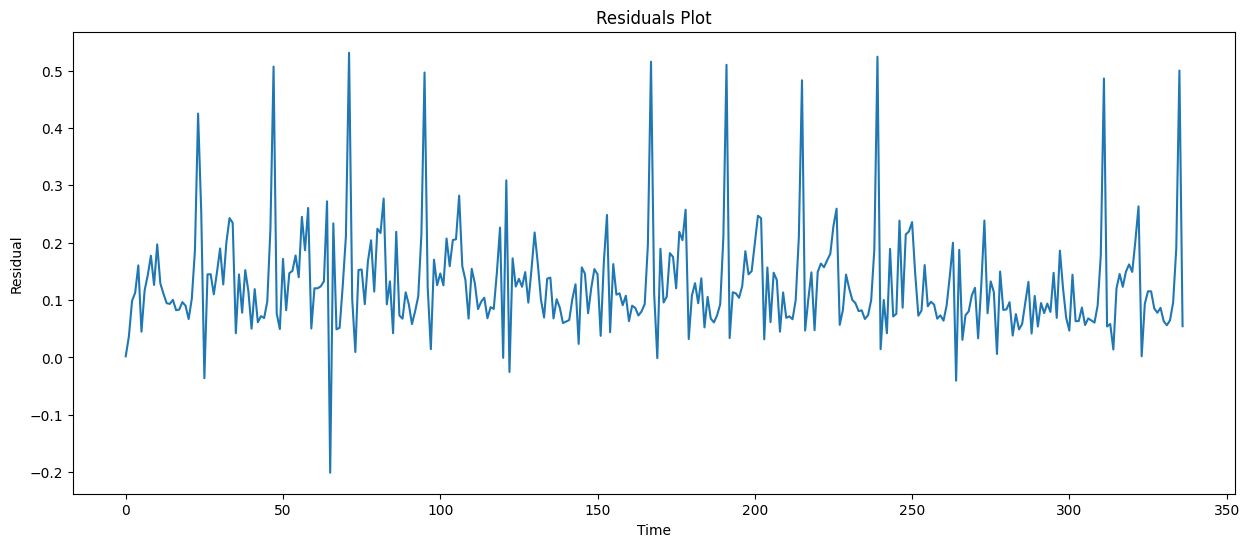

In [11]:
# Residuals Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.ylabel('Residual')
plt.xlabel('Time')
plt.show()

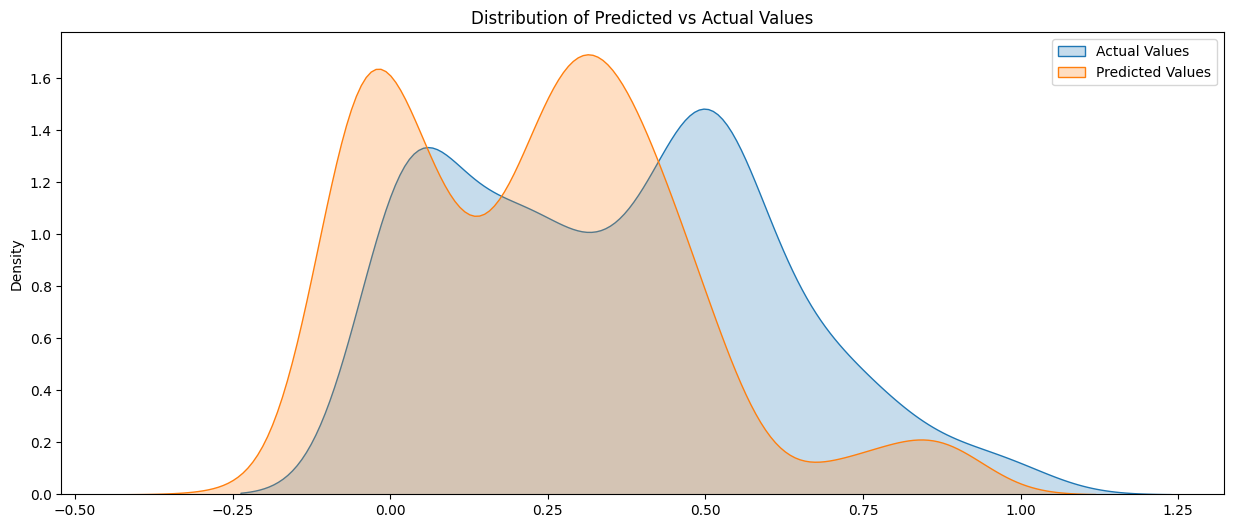

In [12]:
# Distribution of Predicted vs. Actual Values
plt.figure(figsize=(15, 6))
sns.kdeplot(y_test, label='Actual Values', fill=True)
sns.kdeplot(y_pred_test, label='Predicted Values', fill=True)
plt.title('Distribution of Predicted vs Actual Values')
plt.legend()
plt.show()

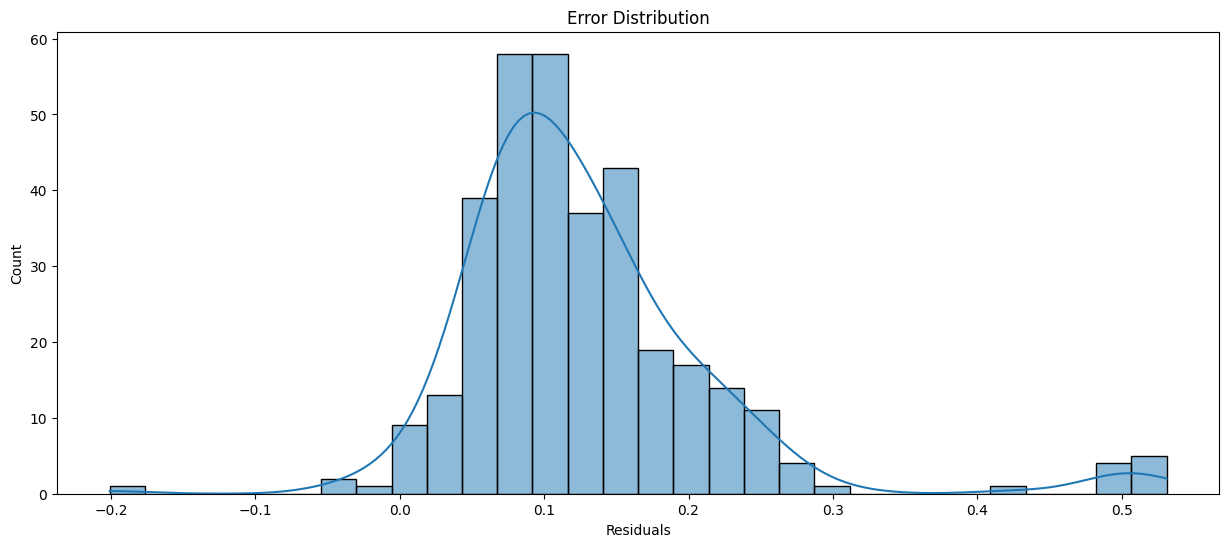

In [13]:
# Error Distribution Plot
plt.figure(figsize=(15, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Error Distribution')
plt.xlabel('Residuals')
plt.show()

### LSTM Model

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Build the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=150, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# Evaluate the model
lstm_train_loss = history.history['loss']
lstm_test_loss = history.history['val_loss']

lstm_train_loss, lstm_test_loss

Epoch 1/20
9/9 [==============================] - 8s 121ms/step - loss: 0.0892 - val_loss: 0.0679
Epoch 2/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0448 - val_loss: 0.0403
Epoch 3/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0266 - val_loss: 0.0236
Epoch 4/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0181 - val_loss: 0.0185
Epoch 5/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0167 - val_loss: 0.0169
Epoch 6/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 7/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0152 - val_loss: 0.0164
Epoch 8/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0149 - val_loss: 0.0161
Epoch 9/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0148 - val_loss: 0.0160
Epoch 10/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0147 - val_loss: 0.0160
Epoch 11/20
9/9 [============

([0.08915751427412033,
  0.04482116177678108,
  0.026597676798701286,
  0.018125003203749657,
  0.016669195145368576,
  0.015391062945127487,
  0.015219833701848984,
  0.014878478832542896,
  0.014778750017285347,
  0.014687325805425644,
  0.014632287435233593,
  0.014604027383029461,
  0.014583802781999111,
  0.014568833634257317,
  0.014564319513738155,
  0.014563831500709057,
  0.014564027078449726,
  0.01456529088318348,
  0.01456753071397543,
  0.014570387080311775],
 [0.06792429834604263,
  0.04034315049648285,
  0.023587683215737343,
  0.018498942255973816,
  0.016904553398489952,
  0.016583073884248734,
  0.016372686251997948,
  0.016088828444480896,
  0.016011351719498634,
  0.0159559678286314,
  0.015904877334833145,
  0.0158780999481678,
  0.01586129702627659,
  0.01585201360285282,
  0.01584709994494915,
  0.015845254063606262,
  0.015844812616705894,
  0.015845272690057755,
  0.015846554189920425,
  0.01584821566939354])

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 4ms/step


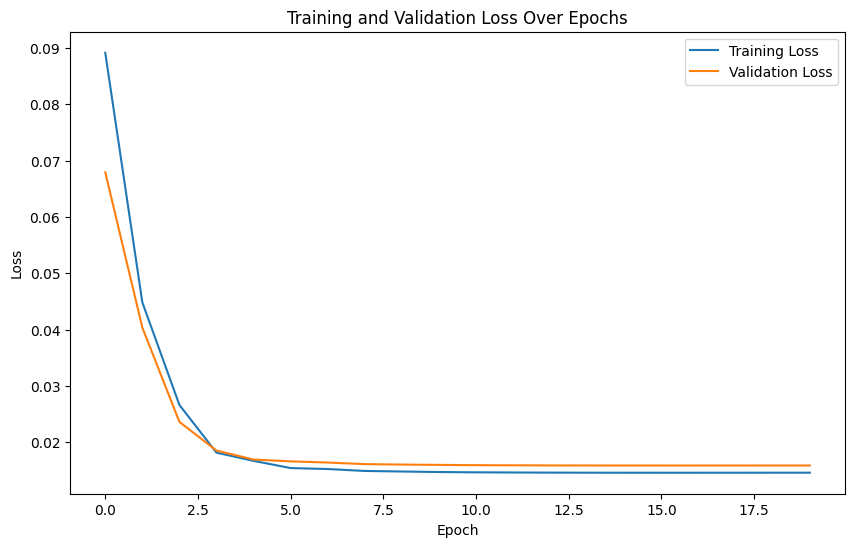

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(lstm_train_loss, label='Training Loss')
plt.plot(lstm_test_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

11/11 [==============================] - 1s 7ms/step


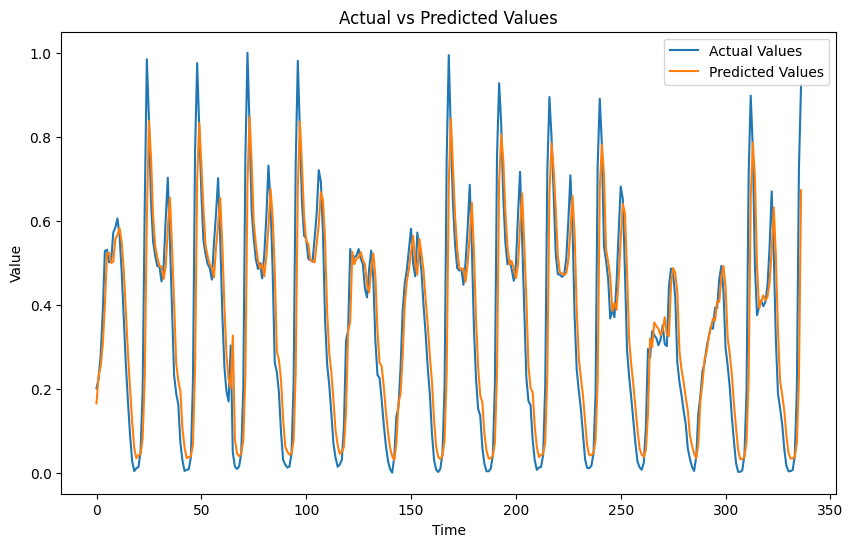

In [18]:
y_pred = lstm_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

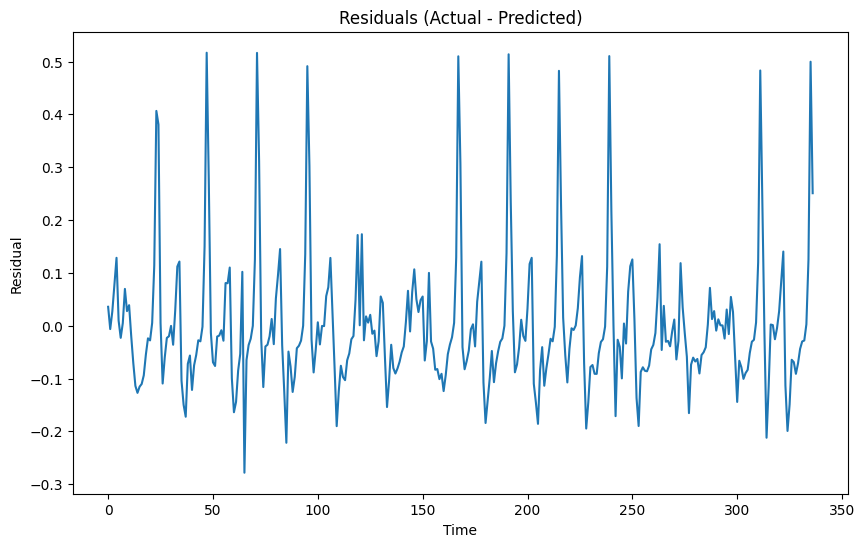

In [19]:
residuals = y_test - y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

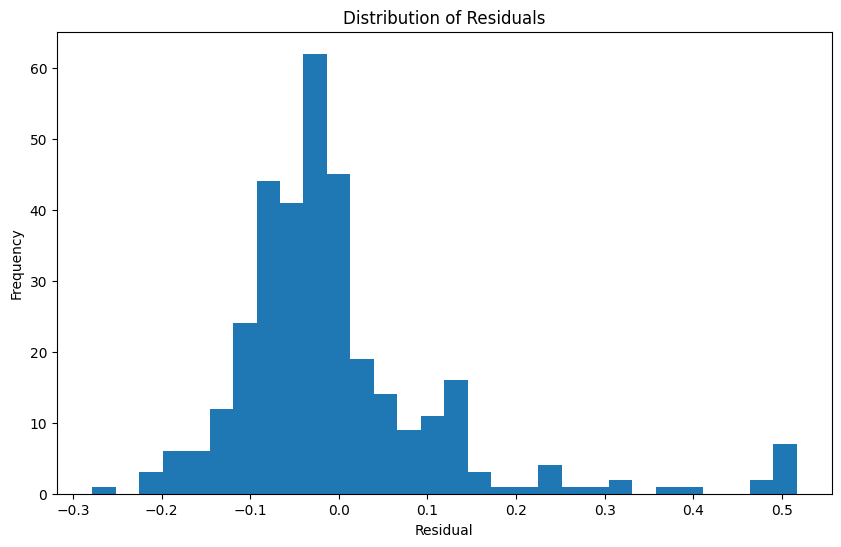

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

### BI-LSTM Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM
from keras.optimizers import Adam

# Define the Bidirectional LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bi_lstm_model.add(Bidirectional(LSTM(units=50)))
bi_lstm_model.add(Dense(1))

# Compile the model
bi_lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = bi_lstm_model.fit(X_train, y_train, epochs=40, batch_size=175, validation_data=(X_test, y_test), verbose=1, shuffle=False)

Epoch 1/40
8/8 [==============================] - 13s 243ms/step - loss: 0.0768 - val_loss: 0.0286
Epoch 2/40
8/8 [==============================] - 0s 16ms/step - loss: 0.0302 - val_loss: 0.0189
Epoch 3/40
8/8 [==============================] - 0s 16ms/step - loss: 0.0190 - val_loss: 0.0184
Epoch 4/40
8/8 [==============================] - 0s 17ms/step - loss: 0.0170 - val_loss: 0.0181
Epoch 5/40
8/8 [==============================] - 0s 17ms/step - loss: 0.0157 - val_loss: 0.0169
Epoch 6/40
8/8 [==============================] - 0s 21ms/step - loss: 0.0150 - val_loss: 0.0161
Epoch 7/40
8/8 [==============================] - 0s 15ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 8/40
8/8 [==============================] - 0s 17ms/step - loss: 0.0147 - val_loss: 0.0160
Epoch 9/40
8/8 [==============================] - 0s 17ms/step - loss: 0.0146 - val_loss: 0.0159
Epoch 10/40
8/8 [==============================] - 0s 15ms/step - loss: 0.0146 - val_loss: 0.0159
Epoch 11/40
8/8 [==========

In [22]:
# Optionally, you can evaluate the model's performance on the test data
bi_lstm_train_loss = history.history['loss']
bi_lstm_test_loss = history.history['val_loss']

In [23]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_pred' contains the predictions from the BI-LSTM model
y_pred = bi_lstm_model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

11/11 [==============================] - 3s 4ms/step
Mean Squared Error: 0.01588866847441576


In [24]:
residuals = y_test - y_pred.flatten()

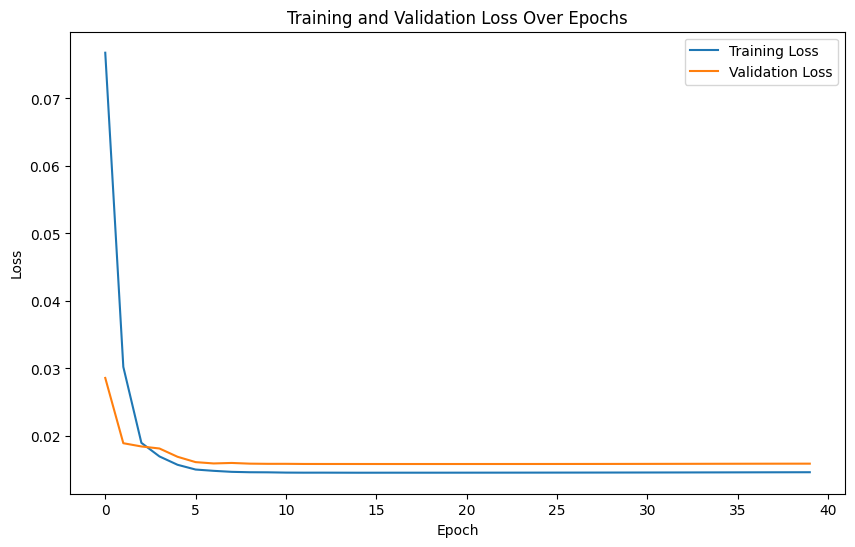

In [25]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(bi_lstm_train_loss, label='Training Loss')
plt.plot(bi_lstm_test_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

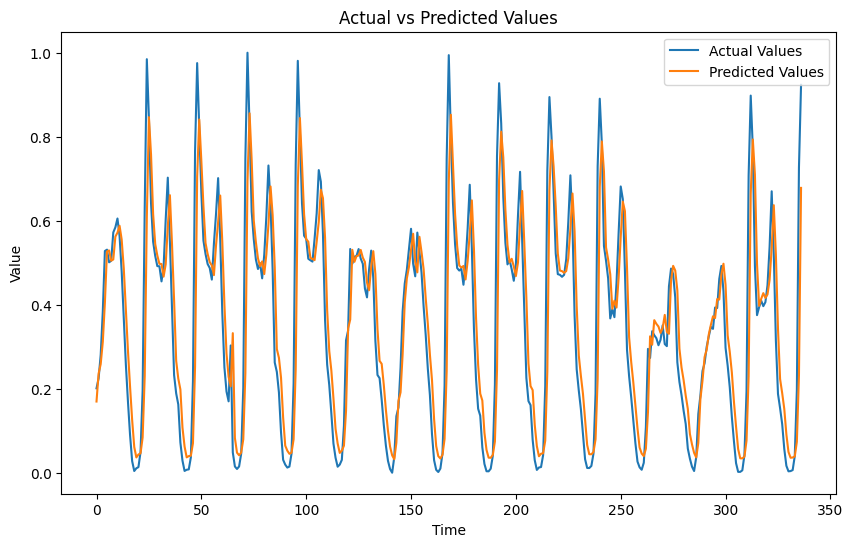

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

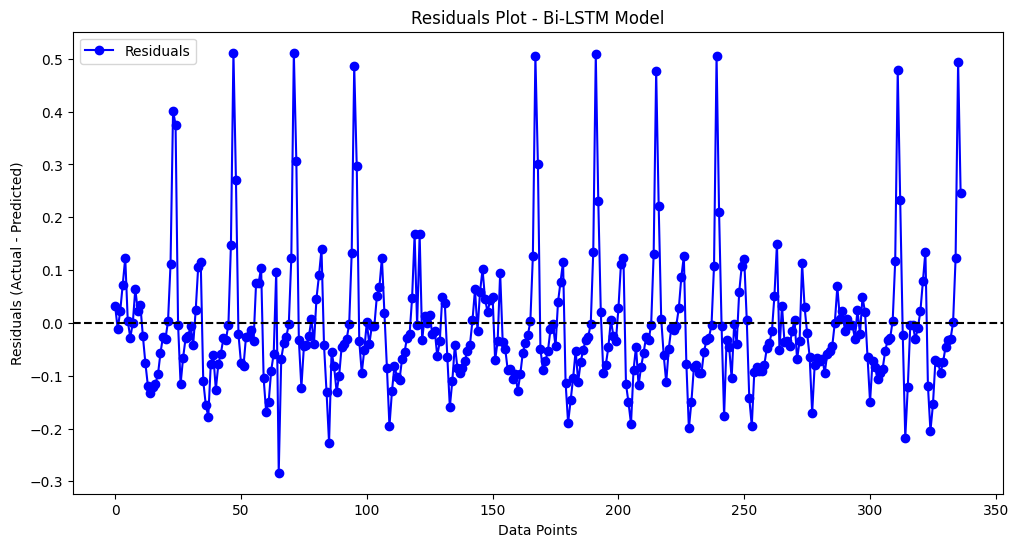

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue', marker='o')
plt.title('Residuals Plot - Bi-LSTM Model')
plt.xlabel('Data Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='black', linestyle='--')  # Adding a horizontal line at 0 for reference
plt.legend()
plt.show()